# Regresión lineal simple

In [3]:
# Importar paquetes
import pandas as pd
import seaborn as sns

In [4]:
# Cargar conjunto de datos
penguins = sns.load_dataset("../data/penguins")

# Examinar las primeras 5 filas del conjunto de datos
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


En las primeras 5 filas del conjunto de datos, podemos ver que hay varias columnas disponibles: `especie`, `isla`, `bill_length_mm`, `bill_profundidad_mm`, `flipper_length_mm`, `body_mass_g` y `sexo`. También parece que faltan algunos datos.

## Limpieza de datos

In [5]:
# Mantenemos los pingüinos Adelie y Gentoo, eliminamos los valores faltantes
penguins_sub = penguins[penguins["species"] != "Chinstrap"]
penguins_final = penguins_sub.dropna()
penguins_final.reset_index(inplace=True, drop=True)

## Análisis de datos exploratorios.

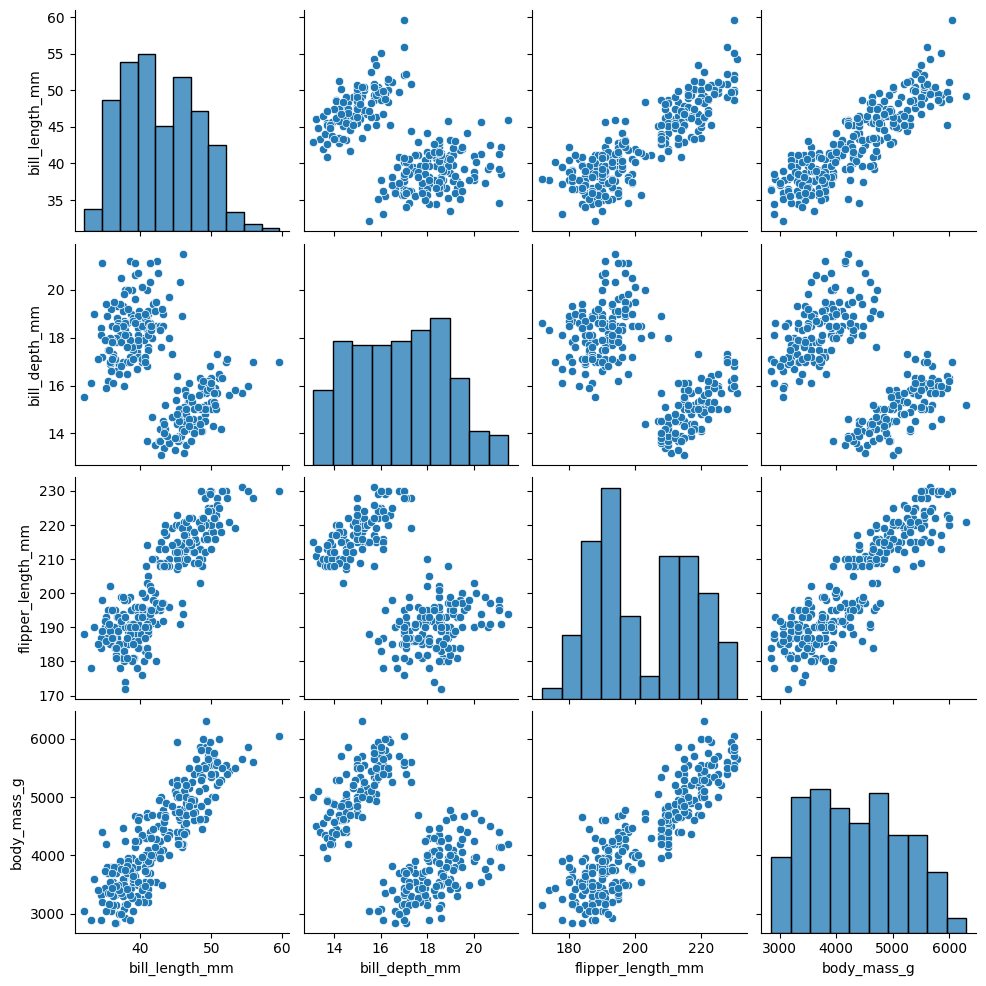

In [6]:
# Crear diagramas de dispersión por pares de un conjunto de datos
sns.pairplot(penguins_final)

En la matriz del diagrama de dispersión, se pueden observar algunas relaciones lineales:
* longitud del pico (mm) y longitud de la aleta (mm)
* longitud del pico (mm) y masa corporal (g)
* longitud de la aleta (mm) y masa corporal (g)

## Construcción del modelo


In [7]:
# Datos de subconjunto
ols_data = penguins_final[["bill_length_mm", "body_mass_g"]]

In [8]:
# Fórmula
ols_formula = "body_mass_g ~ bill_length_mm"

In [9]:
# Importamos función ols
from statsmodels.formula.api import ols

In [10]:
# Construimos OLS y ajustamos el modelo a los datos
OLS = ols(formula = ols_formula, data = ols_data)
model = OLS.fit()

In [11]:
# Obtenemos el resumen del modelo ajustado
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     874.3
Date:                Mon, 17 Nov 2025   Prob (F-statistic):           1.33e-85
Time:                        00:01:26   Log-Likelihood:                -1965.8
No. Observations:                 265   AIC:                             3936.
Df Residuals:                     263   BIC:                             3943.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -1707.2919    205.640     -8.302      0.000   -2112.202   -1302.382
bill_length_mm   141.1904      4.775     29.569      0.000     131.788     150.592
==============================================================================
Omnibus:                        2.060   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.357   Jarque-Bera (JB):                2.103
Skew:                           0.210   Prob(JB):                        0.349
Kurtosis:                       2.882   Cond. No.                         357.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='bill_length_mm', ylabel='body_mass_g'>

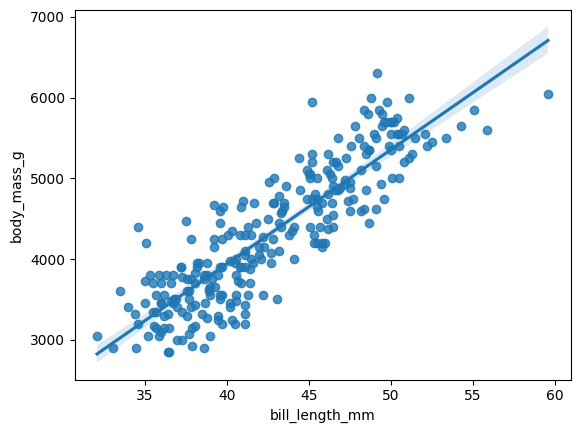

In [12]:
# Visualizamos la línea de regresión ajustada
sns.regplot(x = "bill_length_mm", y = "body_mass_g", data = ols_data)

## Verificamos los supuestos del modelo.

1. Linealidad
2. Normalidad
3. Observaciones independientes
4. Homocedasticidad

Ya se verificó el supuesto de linealidad al crear la matriz del diagrama de dispersión. El supuesto de observaciones independientes tiene más que ver con la recopilación de datos. No hay razón para creer que la masa corporal o la longitud del pico de un pingüino estén relacionadas con las medidas anatómicas de cualquier otro pingüino. Entonces podemos verificar los supuestos 1 y 3.

Los supuestos de normalidad y homocedasticidad se centran en la distribución de errores. Por lo tanto, sólo podrá comprobar estos supuestos después de haber construido el modelo. Para comprobar estos supuestos, comprobaremos los residuos, como una aproximación de los errores.

Para verificar fácilmente los supuestos del modelo y crear visualizaciones relevantes, primero creamos un subconjunto de la variable X aislando solo la columna `bill_length_mm`. Además, guardamos los valores predichos del modelo utilizando la función `model.predict(X)`.

In [13]:
# Variable del subconjunto X
X = ols_data["bill_length_mm"]

# Obtener predicciones del modelo
fitted_values = model.predict(X)

In [14]:
# Calcular residuos
residuals = model.resid

### Verificamos el supuesto de normalidad.

Para verificar el supuesto de normalidad, creamos un histograma de los residuos usando la función `histplot()` del paquete `seaborn`.

En el siguiente histograma, se observa que los residuos se distribuyen casi normalmente. En este caso, es probable que sea lo suficientemente cercano como para que se cumpla el supuesto.

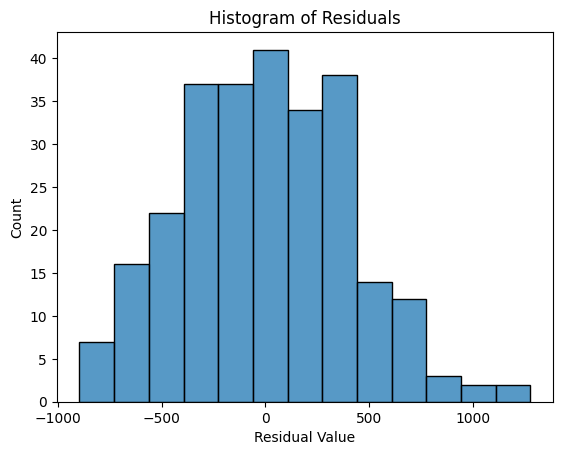

In [15]:
import matplotlib.pyplot as plt
fig = sns.histplot(residuals)
fig.set_xlabel("Residual Value")
fig.set_title("Histogram of Residuals")
plt.show()

Otra forma de comprobar la función de normalidad es con un gráfico cuantil-cuantil o Q-Q. Si los residuos se distribuyen normalmente, se esperaría una línea diagonal recta que vaya desde la parte inferior izquierda hasta la parte superior derecha del gráfico Q-Q.

El gráfico Q-Q muestra un patrón similar al histograma, donde los residuos se distribuyen en su mayoría normalmente, excepto en los extremos de la distribución.

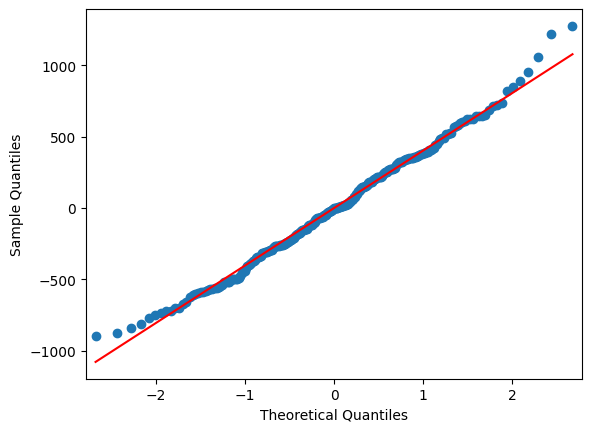

In [16]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
fig = sm.qqplot(model.resid, line = 's')
plt.show()

### Comprobamos el supuesto de homocedasticidad.

Para verificar el supuesto de homocedasticidad, creamos un diagrama de dispersión de los valores ajustados y los residuos. Si la gráfica se asemeja a una nube aleatoria (es decir, los residuos están dispersos aleatoriamente), entonces es probable que se cumpla el supuesto.


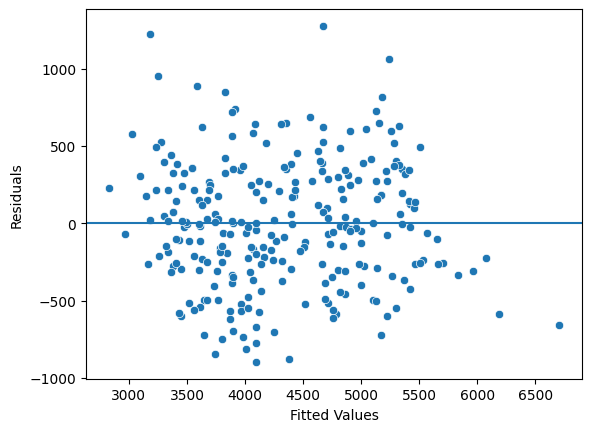

In [17]:
# Importar matplotlib
import matplotlib.pyplot as plt
fig = sns.scatterplot(x=fitted_values, y=residuals)

# Añadir línea de referencia en residuos = 0
fig.axhline(0)

# Establecer etiquetas de eje x y eje y
fig.set_xlabel("Fitted Values")
fig.set_ylabel("Residuals")

# mostrar la trama
plt.show()